# День 3: Подготовка данных и первая модель ML
**Цель:** Подготовить данные Titanic для машинного обучения и обучить модель для прогнозирования выживания.

In [1]:
# Установка scikit-learn через pip (внутри ноутбука)
!pip install scikit-learn -q
print("✅ scikit-learn установлен!")

✅ scikit-learn установлен!


In [3]:
# Импорт библиотек для анализа и визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Импорт инструментов МАШИННОГО ОБУЧЕНИЯ из Scikit-learn
# 1. Для разделения данных
from sklearn.model_selection import train_test_split
# 2. Для кодирования текстовых признаков
from sklearn.preprocessing import LabelEncoder
# 3. Для масштабирования числовых признаков
from sklearn.preprocessing import StandardScaler
# 4. Модель: Логистическая регрессия (простая и интерпретируемая)
from sklearn.linear_model import LogisticRegression
# 5. Метрики для оценки качества модели
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ Все инструменты загружены. Готовим данные к машинному обучению!")  


✅ Все инструменты загружены. Готовим данные к машинному обучению!


In [4]:
# Загрузка данных Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(f"📊 Размер исходных данных: {df.shape}")
print("\n🔍 Первые 3 строки:")
df.head(3)

📊 Размер исходных данных: (891, 12)

🔍 Первые 3 строки:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# 1. Выбираем признаки (features) на основе анализа из Дня 2
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()  # X - таблица с признаками для обучения

# 2. Определяем целевую переменную (что будем предсказывать)
y = df['Survived'].copy()  # y - "правильные ответы" (выжил/не выжил)

print(f"📈 Признаки для обучения (X):")
print(f"   {features}")
print(f"🎯 Целевая переменная (y): 'Survived'")
print(f"\n📐 Размеры:")
print(f"   X (признаки): {X.shape}")  # Должно быть (891, 7)
print(f"   y (цель): {y.shape}")      # Должно быть (891,)

📈 Признаки для обучения (X):
   ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
🎯 Целевая переменная (y): 'Survived'

📐 Размеры:
   X (признаки): (891, 7)
   y (цель): (891,)


In [6]:
print("🔍 Проверяем пропуски в признаках (X):")
print(X.isnull().sum())
print(f"\nВсего строк в данных: {len(X)}")

🔍 Проверяем пропуски в признаках (X):
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Всего строк в данных: 891


In [7]:
# === БЛОК 1: Загрузка данных ===
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(f"📊 Размер данных: {df.shape}")
print("🔍 Первые 3 строки:")
print(df.head(3))

# === БЛОК 2: Выбор признаков и цели ===
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
y = df['Survived'].copy()
print(f"\n📈 Признаки (X): {features}")
print(f"🎯 Цель (y): 'Survived'")
print(f"📐 Размер X: {X.shape}, Размер y: {y.shape}")

# === БЛОК 3: Проверка пропусков ===
print("\n🔍 Пропуски в данных (X):")
print(X.isnull().sum())

📊 Размер данных: (891, 12)
🔍 Первые 3 строки:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  

📈 Признаки (X): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
🎯 Цель (y): 'Survived'
📐 Размер X: (891, 7), Размер y: (891,)

🔍 Пропуски в данных (X):
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: i

In [8]:
# Создаем копию для безопасной работы
X_clean = X.copy()

print("🔧 Заполняем пропуски...")

# 1. Заполняем пропуски в 'Age' МЕДИАННЫМ возрастом (более устойчиво, чем среднее)
median_age = X_clean['Age'].median()
X_clean['Age'] = X_clean['Age'].fillna(median_age)
print(f"   ✅ Age: заполнили {X['Age'].isnull().sum()} пропусков медианой = {median_age:.1f} лет")

# 2. Заполняем 2 пропуска в 'Embarked' САМЫМ ЧАСТЫМ значением (модой)
most_common_embarked = X_clean['Embarked'].mode()[0]
X_clean['Embarked'] = X_clean['Embarked'].fillna(most_common_embarked)
print(f"   ✅ Embarked: заполнили {X['Embarked'].isnull().sum()} пропуска значением '{most_common_embarked}'")

# 3. В 'Fare' был 1 пропуск. Заполняем медианой для 3-го класса
fare_median_pclass3 = df[df['Pclass'] == 3]['Fare'].median()
X_clean['Fare'] = X_clean['Fare'].fillna(fare_median_pclass3)
print(f"   ✅ Fare: заполнили 1 пропуск медианой для 3-го класса = {fare_median_pclass3:.2f}")

print("\n🎯 Проверяем, что ВСЕ пропуски исчезли:")
print(X_clean.isnull().sum())


🔧 Заполняем пропуски...
   ✅ Age: заполнили 177 пропусков медианой = 28.0 лет
   ✅ Embarked: заполнили 2 пропуска значением 'S'
   ✅ Fare: заполнили 1 пропуск медианой для 3-го класса = 8.05

🎯 Проверяем, что ВСЕ пропуски исчезли:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [9]:
# Копируем очищенные данные для кодирования
X_encoded = X_clean.copy()

print("🔤 Кодируем текстовые признаки в числа...")

# 1. Кодируем 'Sex' (Пол): male -> 1, female -> 0
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
X_encoded['Sex_encoded'] = le_sex.fit_transform(X_encoded['Sex'])

# 2. Кодируем 'Embarked' (Порт посадки): S -> 0, C -> 1, Q -> 2
le_embarked = LabelEncoder()
X_encoded['Embarked_encoded'] = le_embarked.fit_transform(X_encoded['Embarked'])

# 3. Удаляем старые текстовые столбцы (они больше не нужны)
X_encoded = X_encoded.drop(['Sex', 'Embarked'], axis=1)

print("✅ Готово!")
print(f"Новые столбцы (все числовые): {list(X_encoded.columns)}")
print("\nПервые 5 строк после кодирования:")
X_encoded.head()

🔤 Кодируем текстовые признаки в числа...
✅ Готово!
Новые столбцы (все числовые): ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded']

Первые 5 строк после кодирования:


,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_encoded
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


если бы на Титанике был один 200-летний пассажир, среднее возраст сильно исказилось бы, а медиана — нет

In [10]:
# Разделяем данные на обучающую (80%) и тестовую (20%) выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,  # наши признаки
    y,          # целевая переменная (выжил/не выжил)
    test_size=0.2,      # 20% данных оставляем на тест
    random_state=42,    # фиксируем случайность для воспроизводимости
    stratify=y          # сохраняем пропорцию выживших в обеих выборках
)

print("📊 Разделение данных завершено:")
print(f"  Обучающая выборка (train): {X_train.shape[0]} пассажиров")
print(f"  Тестовая выборка (test):   {X_test.shape[0]} пассажиров")
print(f"\nПроцент выживших в обучающей: {y_train.mean():.1%}")
print(f"Процент выживших в тестовой:   {y_test.mean():.1%}")
print("\n✅ Готово к обучению модели!")

📊 Разделение данных завершено:
  Обучающая выборка (train): 712 пассажиров
  Тестовая выборка (test):   179 пассажиров

Процент выживших в обучающей: 38.3%
Процент выживших в тестовой:   38.5%

✅ Готово к обучению модели!


In [11]:
# Масштабируем числовые признаки (приводим к одному масштабу)
from sklearn.preprocessing import StandardScaler

# 1. Выбираем числовые колонки для масштабирования
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# 2. Создаём и обучаем scaler НА ОБУЧАЮЩИХ ДАННЫХ
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# 3. Применяем тот же scaler к тестовым данным (БЕЗ повторного обучения!)
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("⚖️ Масштабирование завершено!")
print("Пример до масштабирования (первые 3 строки Age из train):")
print(X_train['Age'].head(3).values)
print("\nПример после масштабирования (те же строки):")
print(X_train_scaled['Age'].head(3).values)
print(f"\nСреднее Age после масштабирования: {X_train_scaled['Age'].mean():.2f}")
print(f"Стандартное отклонение Age: {X_train_scaled['Age'].std():.2f}")

⚖️ Масштабирование завершено!
Пример до масштабирования (первые 3 строки Age из train):
[28. 28. 28.]

Пример после масштабирования (те же строки):
[-0.11207776 -0.11207776 -0.11207776]

Среднее Age после масштабирования: 0.00
Стандартное отклонение Age: 1.00


In [12]:
# Создаём и обучаем модель логистической регрессии
from sklearn.linear_model import LogisticRegression

# 1. Создаём модель
model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Обучаем модель на масштабированных обучающих данных
model.fit(X_train_scaled, y_train)

print("✅ Модель обучена!")
print(f"Коэффициенты модели: {model.coef_}")
print(f"Свободный член (intercept): {model.intercept_}")

✅ Модель обучена!
Коэффициенты модели: [[-1.04495427 -0.48882835 -0.25983588 -0.07275478  0.10396646 -2.58885023
  -0.23085401]]
Свободный член (intercept): [3.79089919]


In [13]:
# 1. Делаем предсказания на тестовых данных
y_pred = model.predict(X_test_scaled)

# 2. Оцениваем точность модели
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Точность модели: {accuracy:.2%}")
print(f"\n📊 Отчёт по классификации:")
print(classification_report(y_test, y_pred, target_names=['Не выжил', 'Выжил']))

🎯 Точность модели: 80.45%

📊 Отчёт по классификации:
              precision    recall  f1-score   support

    Не выжил       0.81      0.89      0.85       110
       Выжил       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



🎯 ИТОГИ ДНЯ 3: ПЕРВАЯ МОДЕЛЬ МАШИННОГО ОБУЧЕНИЯ

📊 Точность модели: 80.45%

📋 Матрица ошибок:
   [[ TN,  FP ]
    [ FN,  TP ]]

[[98 12]
 [23 46]]


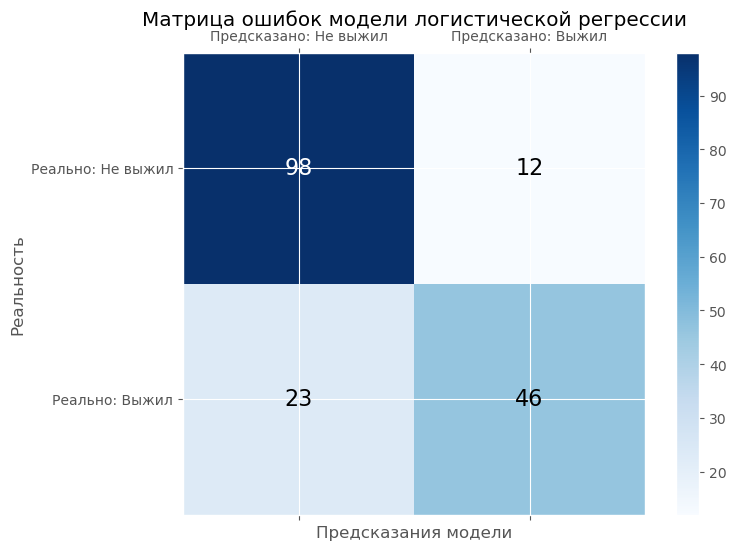


🔍 АНАЛИЗ ОШИБОК:
   • Модель правильно предсказала 98 случаев 'не выжил'
   • Модель правильно предсказала 46 случаев 'выжил'
   • Ошибка 1: Сказала 'выжил', но не выжил (FP): 12 раз
   • Ошибка 2: Сказала 'не выжил', но выжил (FN): 23 раз

⚠️  Модель чаще ошибается, говоря 'НЕ ВЫЖИЛ', когда человек ВЫЖИЛ

✅ ДЕНЬ 3 ЗАВЕРШЁН! У ВАС РАБОТАЮЩАЯ ML-МОДЕЛЬ!


In [15]:
# === ФИНАЛЬНЫЙ ШАГ: Матрица ошибок и итоги ===
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

print("=" * 50)
print("🎯 ИТОГИ ДНЯ 3: ПЕРВАЯ МОДЕЛЬ МАШИННОГО ОБУЧЕНИЯ")
print("=" * 50)

print(f"\n📊 Точность модели: {accuracy:.2%}")

print("\n📋 Матрица ошибок:")
print("   [[ TN,  FP ]")
print("    [ FN,  TP ]]")
print(f"\n{cm}")

# 2. Визуализация матрицы ошибок (БЕЗ seaborn)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')
plt.colorbar(cax)

# Подписи
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Предсказано: Не выжил', 'Предсказано: Выжил'])
ax.set_yticklabels(['Реально: Не выжил', 'Реально: Выжил'])

# Числа в ячейках
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', 
                color='white' if cm[i, j] > cm.max()/2 else 'black', fontsize=16)

plt.title('Матрица ошибок модели логистической регрессии', pad=20)
plt.xlabel('Предсказания модели')
plt.ylabel('Реальность')
plt.show()

# 3. Анализ ошибок
print("\n🔍 АНАЛИЗ ОШИБОК:")
print(f"   • Модель правильно предсказала {cm[0,0]} случаев 'не выжил'")
print(f"   • Модель правильно предсказала {cm[1,1]} случаев 'выжил'")
print(f"   • Ошибка 1: Сказала 'выжил', но не выжил (FP): {cm[0,1]} раз")
print(f"   • Ошибка 2: Сказала 'не выжил', но выжил (FN): {cm[1,0]} раз")

if cm[0,1] > cm[1,0]:
    print("\n⚠️  Модель чаще ошибается, говоря 'ВЫЖИЛ', когда человек НЕ ВЫЖИЛ")
else:
    print("\n⚠️  Модель чаще ошибается, говоря 'НЕ ВЫЖИЛ', когда человек ВЫЖИЛ")

print("\n" + "=" * 50)
print("✅ ДЕНЬ 3 ЗАВЕРШЁН! У ВАС РАБОТАЮЩАЯ ML-МОДЕЛЬ!")
print("=" * 50) 